The General Bathymetric Chart of the Oceans is a compilation of a ship depth soundings and
satellite gravity data and images.
- Using quality-controlled data to begin with, values between
sounded depths have been interpolated with gravity data obtained by satellites.
Source Identifier (SID) Grid describes which measurements are from soundings or predictions

## Summary
- Data Format: netCDF-3
- Angular resolution: 30sec and 1◦ grids

### Processing Remote Sensing Data with Python Documentation, Release 1
- (0,0) position at northwest corner of file
- Grid pixels are center-registered
- Data organization: Single data file for whole globe
– 21,600 rows x 43,200 columns = 933,120,000 data points
- Units: depth in meters. Bathymetric depths are negative and topographic positive
- Date Range: Dates of soundings vary. Most recent 2010
- Data quality control: separate file with SID grid of data sources and quality

- You will have the option of downloading either
the gebco_08.nc file for the 30sec gridded data or the gridone.nc file for the 1◦.

- You may also download the SID grid which contains flags corresponding to each data point as
to whether it is a sounding or interpolated, and the quality of each.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from netCDF4 import Dataset as dt # note the change of case in netCDF4

In [2]:
no2 = xr.open_dataarray("GRIDONE_2D.nc")
no2

<xarray.DataArray 'elevation' (lat: 10801, lon: 21601)>
[233312401 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
Attributes:
    long_name:     Elevation relative to sea level
    units:         m
    actual_range:  [-10577.   8430.]

In [3]:
df = no2.to_dataframe()

In [4]:
df['elevation'].min(),df['elevation'].max(),df['elevation'].mean()

(-10577.0, 8430.0, -591.4473876953125)

In [5]:
df[df['elevation']==8430]

,,elevation
lat,lon,
27.983333,86.933333,8430.0


In [6]:
no2.indexes['lat'].shape,no2.indexes['lon'].shape

((10801,), (21601,))

In [7]:
type(no2)

xarray.core.dataarray.DataArray

In [8]:
no2.attrs

OrderedDict([('long_name', 'Elevation relative to sea level'),
             ('units', 'm'),
             ('actual_range', array([-10577.,   8430.]))])

In [9]:
no2.actual_range

array([-10577.,   8430.])

In [10]:
no2.coords

Coordinates:
  * lat      (lat) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0

In [11]:
no2.data

array([[ 2775.,  2775.,  2775., ...,  2775.,  2775.,  2775.],
       [ 2774.,  2774.,  2774., ...,  2774.,  2774.,  2774.],
       [ 2774.,  2774.,  2774., ...,  2774.,  2774.,  2774.],
       ...,
       [-4228., -4228., -4228., ..., -4228., -4228., -4228.],
       [-4229., -4229., -4229., ..., -4229., -4229., -4229.],
       [-4227., -4227., -4227., ..., -4227., -4227., -4227.]],
      dtype=float32)

In [12]:
no2.dims

('lat', 'lon')

In [13]:
filestr = 'GRIDONE_2D.nc' # This is the file name

ncfile = dt(filestr, 'r') # Create a netcdf object in read mode

print (ncfile.variables) # To print all the variables




OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (10801,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (21601,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('elevation', <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    long_name: Elevation relative to sea level
    units: m
    scale_factor: 1.0
    add_offset: 0.0
    actual_range: [-10577.   8430.]
unlimited dimensions: 
current shape = (10801, 21601)
filling on, default _FillValue of -32767 used
)])


In [14]:
lat = np.array(ncfile.variables['lat'][:],dtype=np.float32)
print(lat)

[-90.      -89.98333 -89.96667 ...  89.96667  89.98333  90.     ]


In [15]:
lon = np.array(ncfile.variables['lon'][:],dtype=np.float32)
print(lon)

[-180.      -179.98334 -179.96666 ...  179.96666  179.98334  180.     ]


In [16]:
ele = np.array(ncfile.variables['elevation'][:],dtype=np.float32)
print(ele)

[[ 2775.  2775.  2775. ...  2775.  2775.  2775.]
 [ 2774.  2774.  2774. ...  2774.  2774.  2774.]
 [ 2774.  2774.  2774. ...  2774.  2774.  2774.]
 ...
 [-4228. -4228. -4228. ... -4228. -4228. -4228.]
 [-4229. -4229. -4229. ... -4229. -4229. -4229.]
 [-4227. -4227. -4227. ... -4227. -4227. -4227.]]


# 2-D Plots

In [17]:
# plt.contourf(x,y,z)  # Colour Filled
# plt.contour(x,y,z)   # Empty Coloured

In [18]:
print(lat.shape)
print(lon.shape)
print(ele.shape)

(10801,)
(21601,)
(10801, 21601)


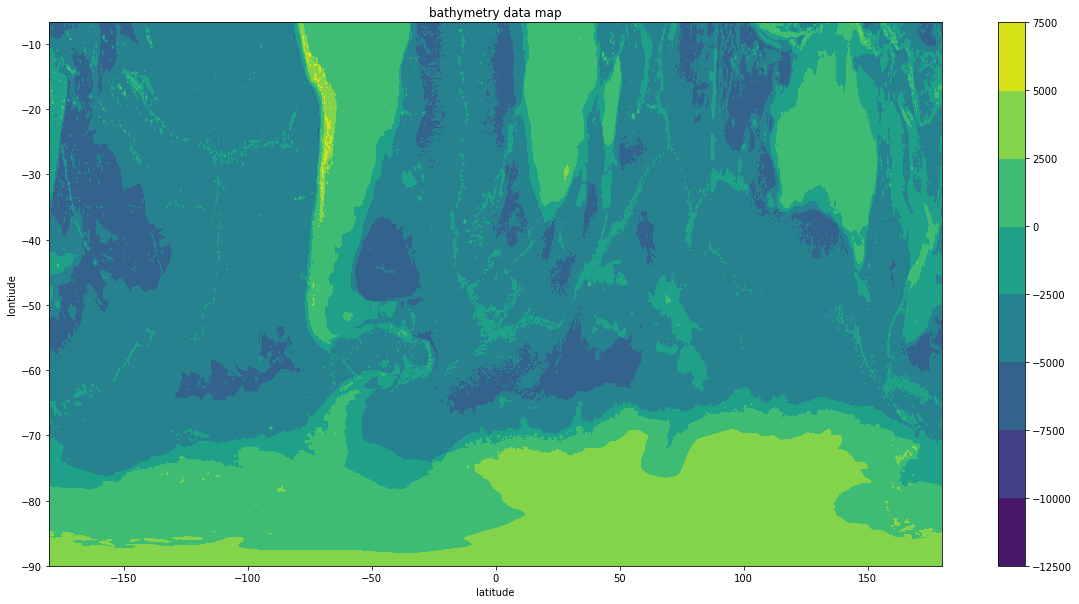

In [19]:
plt.figure(figsize=(20,10))
plt.contourf(lon[:],lat[:5000],ele[:][:5000]) # Plotting data
plt.colorbar()                   # Making Colour Bar visible
plt.ylabel('lontiude')
plt.xlabel('latitude')
plt.title('bathymetry data map')
plt.show()